In [189]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from functools import reduce

In [190]:
happiness_2016_csv_file = pd.read_csv('Dataset/2016.csv')
happiness_2017_csv_file = pd.read_csv('Dataset/2017.csv')
happiness_2018_csv_file = pd.read_csv('Dataset/2018.csv')

In [191]:
happiness_2018_csv_file.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
0,Finland,1,7.632,1.305,0.874,0.681
1,Norway,2,7.594,1.456,0.861,0.686
2,Denmark,3,7.555,1.351,0.868,0.683
3,Iceland,4,7.495,1.343,0.914,0.677
4,Switzerland,5,7.487,1.420,0.927,0.660


In [192]:
happiness_2017_csv_file = happiness_2017_csv_file.rename(columns={'Happiness.Rank':'Happiness Rank','Happiness.Score':'Happiness Score'})
happiness_2018_csv_file = happiness_2018_csv_file.rename(columns={'Rank':'Happiness Rank','Score':'Happiness Score'})

#list(happiness_2016_csv_file)
#list(happiness_2017_csv_file)
#list(happiness_2018_csv_file)

In [193]:
happiness_2016 = happiness_2016_csv_file[['Country','Happiness Score']]
happiness_2016 = happiness_2016.dropna()
happiness_2016.head()

,Country,Happiness Score
0,Denmark,7.526
1,Switzerland,7.509
2,Iceland,7.501
3,Norway,7.498
4,Finland,7.413


In [194]:
happiness_2017 = happiness_2017_csv_file[['Country','Happiness Score']]
#happiness_2017.head()

In [195]:
happiness_2018 = happiness_2018_csv_file[['Country','Happiness Score']]
#happiness_2018.head()

In [196]:
indicator_csv_file = pd.read_csv('Dataset/countries_GDP.csv')
indicator_csv_file.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [197]:
infant_mortality_df = indicator_csv_file[['Country','Infant mortality (per 1000 births)']]
#infant_mortality_df.head()

In [198]:
infant_mortality_df_clean = infant_mortality_df.dropna()
#infant_mortality_df_clean.head()

In [199]:
infant_mortality_df_formatted = infant_mortality_df_clean[['Country','Infant mortality (per 1000 births)']].replace(',','.',regex=True)
infant_mortality_df_formatted.head()

,Country,Infant mortality (per 1000 births)
0,Afghanistan,163.07
1,Albania,21.52
2,Algeria,31
3,American Samoa,9.27
4,Andorra,4.05


In [200]:
happiness_infant_mortality_2016 = infant_mortality_df_formatted.combine_first(happiness_2016)

In [201]:
happiness_infant_mortality_2016.dropna(inplace=True)

In [202]:
happiness_infant_mortality_2016.head()

,Country,Happiness Score,Infant mortality (per 1000 births)
0,Afghanistan,7.526,163.07
1,Albania,7.509,21.52
2,Algeria,7.501,31
3,American Samoa,7.498,9.27
4,Andorra,7.413,4.05


In [203]:
happiness = happiness_infant_mortality_2016['Happiness Score'].dropna().astype(float)
#print(len(happiness))

In [204]:
mortality = happiness_infant_mortality_2016['Infant mortality (per 1000 births)'].dropna().astype(float)
#print(len(mortality))

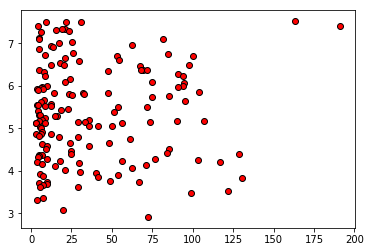

In [205]:
plt.scatter(mortality,happiness, marker="o", facecolors="red", edgecolors="black")
plt.title = ("Happiness vs Infant Mortality(per 1000 births)")
plt.ylabel = ("Happiness")
plt.xlabel = ("Infant Mortality(per 1000 births)")

In [206]:
literacy_df = indicator_csv_file[['Country','Literacy (%)']]
literacy_df_clean = literacy_df.dropna()
literacy_df_formatted = literacy_df_clean[['Country','Literacy (%)']].replace(',','.',regex=True)
literacy_df_formatted.head()

,Country,Literacy (%)
0,Afghanistan,36.0
1,Albania,86.5
2,Algeria,70.0
3,American Samoa,97.0
4,Andorra,100.0


In [207]:
happiness_literacy_2016 = literacy_df_formatted.combine_first(happiness_2016)

In [208]:
happiness_literacy_2016.dropna(inplace=True)

In [209]:
happiness_literacy_2016.head()

,Country,Happiness Score,Literacy (%)
0,Afghanistan,7.526,36.0
1,Albania,7.509,86.5
2,Algeria,7.501,70.0
3,American Samoa,7.498,97.0
4,Andorra,7.413,100.0


In [210]:
happiness = happiness_literacy_2016['Happiness Score'].dropna().astype(float)
#print(len(happiness))

In [211]:
literacy = happiness_literacy_2016['Literacy (%)'].dropna().astype(float)
#print(len(literacy))

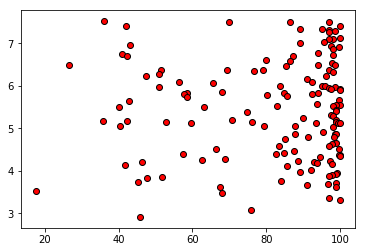

In [212]:
plt.scatter(literacy,happiness, marker="o", facecolors="red", edgecolors="black")
plt.title=("Happiness vs Literacy(%)")
plt.ylabel = ("Happiness")
plt.xlabel = ("Literacy (%)")
plt.show()